In [ ]:
# pip install pygraphviz
# https://pygraphviz.github.io/documentation/stable/install.html

In [1]:
import os
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
from operator import itemgetter
import pygraphviz

In [63]:
import graphs

In [2]:
os.getcwd()

'/Users/Sophie/Documents/GitHub/Analysis_and_Modelling_Social_Interactions'

## Load data

In [3]:
df = pd.read_excel('European_electricity_network_vFinal.xlsx', sheet_name='2018')
df.head()

,Origin_Country,Country_Code,AL,AT,BA,BE,BG,CH,CZ,DE,...,NL,NO,PL,PT,RO,RS,SE,SI,SK,TR
0,Albania,AL,NaN,0.0,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,880.0,0.0,0.0,0.0,0.0
1,Austria,AT,0.0,NaN,0.0,0.0,0.0,5595,112.0,4079.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4096.0,0.0,0.0
2,Bosnia and Herzegovina,BA,0.0,0.0,NaN,0.0,0.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,488.0,0.0,0.0,0.0,0.0
3,Belgium,BE,0.0,0.0,0.0,NaN,0.0,0,0.0,0.0,...,1776.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Bulgaria,BG,0.0,0.0,0.0,0.0,NaN,0,0.0,0.0,...,0.0,0.0,0.0,0.0,1213.0,2305.0,0.0,0.0,0.0,2058.0


In [4]:
df_elec = df.drop(['Origin_Country'], axis=1)
df_elec.head()

,Country_Code,AL,AT,BA,BE,BG,CH,CZ,DE,DK,...,NL,NO,PL,PT,RO,RS,SE,SI,SK,TR
0,AL,NaN,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,880.0,0.0,0.0,0.0,0.0
1,AT,0.0,NaN,0.0,0.0,0.0,5595,112.0,4079.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4096.0,0.0,0.0
2,BA,0.0,0.0,NaN,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,488.0,0.0,0.0,0.0,0.0
3,BE,0.0,0.0,0.0,NaN,0.0,0,0.0,0.0,0.0,...,1776.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,BG,0.0,0.0,0.0,0.0,NaN,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1213.0,2305.0,0.0,0.0,0.0,2058.0


## Sort and clean up data

In [5]:
# Convert the wide table to long table
Country_list = list(df_elec.columns)
df_elec = df_elec.melt(id_vars=['Country_Code'], value_vars=(Country_list[1:]), var_name='Destination', value_name='Electricity_Flow')
df_elec.rename(columns={'Country_Code':'Origin'}, inplace=True)
df_elec.head()

,Origin,Destination,Electricity_Flow
0,AL,AL,NaN
1,AT,AL,0.0
2,BA,AL,0.0
3,BE,AL,0.0
4,BG,AL,0.0


In [6]:
# Sort the table based on origin country's name
df_elec.sort_values('Origin', inplace=True, ascending=True)
df_elec.reset_index(drop=True, inplace=True)

# Delete NAs (when Origin=Destination)
df_elec.dropna(axis=0, inplace=True) 

# Delete zero-value rows
df_elec = df_elec[df_elec.Electricity_Flow != 0]
df_elec.head()

,Origin,Destination,Electricity_Flow
12,AL,GR,1061.0
20,AL,ME,742.0
27,AL,RS,880.0
39,AT,SI,4096.0
40,AT,DE,4079.0


In [10]:
edge_size = np.asarray(df_elec['Electricity_Flow'])
edge_size
len(edge_size)

128

In [11]:
df_total_export = df_elec.groupby(['Origin'], as_index=False).sum()
# df_total_export.reset_index()
df_total_export.head()
# total_export = np.asarray(df_total_export['Electricity_Flow'])
nodelist = list(df_total_export['Origin'])

In [12]:
type(df_total_export)
df_total_export.head()

,Origin,Electricity_Flow
0,AL,2683.0
1,AT,19057.0
2,BA,7697.0
3,BE,4313.0
4,BG,10029.0


In [13]:
# use this to compare the size of the nodes
df_total_export_sorted = df_total_export.sort_values(by='Electricity_Flow', ascending=False)
df_total_export_sorted

,Origin,Electricity_Flow
7,DE,82674.0
12,FR,75789.0
5,CH,31694.0
30,SE,31562.0
6,CZ,25459.0
1,AT,19057.0
24,NL,18597.0
25,NO,17954.0
8,DK,10413.0
4,BG,10029.0


In [14]:
total_export = np.asarray(df_total_export['Electricity_Flow'])
total_export

array([ 2683., 19057.,  7697.,  4313., 10029., 31694., 25459., 82674.,
       10413.,  4136.,  9129.,  3459., 75789.,  2189.,  2265.,  6533.,
        4260.,  1643.,  2638.,  2560.,  1349.,  4269.,  3011.,  2224.,
       18597., 17954.,  8111.,  8324.,  4921.,  6703., 31562.,  9320.,
        6949.,  3001.])

In [15]:
# when signing the code_size, it must have the same length of country list
len(total_export)

34

In [ ]:
# df_elec.to_csv('European_electricity_network.csv', index=False, header=True)

## Create the network

In [16]:
class create_graph:
    """
    read the dataframe and creates the two elements that form a graph, nodes and edges
    """
    
    def __init__(self):
        data = df_elec
        self.Network = df_elec
        
        # create list of Origin-Destination pairs
        self.graph = np.asarray(self.Network[['Origin', 'Destination']])
        
        self.nodes = np.unique(self.graph)
        self.weights = list(map(float, self.Network['Electricity_Flow']))
    
    def networkList(self):
        G = nx.DiGraph() # create a directed graph called G
        
        # add nodes
        for node in self.nodes:
            G.add_node(node)
        
       # add edges 
        self.graph_1 = []
        for edge in self.graph:
            G.add_edge(edge[0], edge[1])
            self.graph_1.append((edge[0], edge[1]))
        
        # add lables as a dictionary, key is Origin-Destination pair, value is flow
        labels = dict(list(zip(self.graph_1, self.weights)))
        
        return G, labels

In [17]:
gr = create_graph()
graph = gr.graph 
G, labels = gr.networkList() 

In [100]:
# graph

In [101]:
# labels

In [102]:
# G.degree

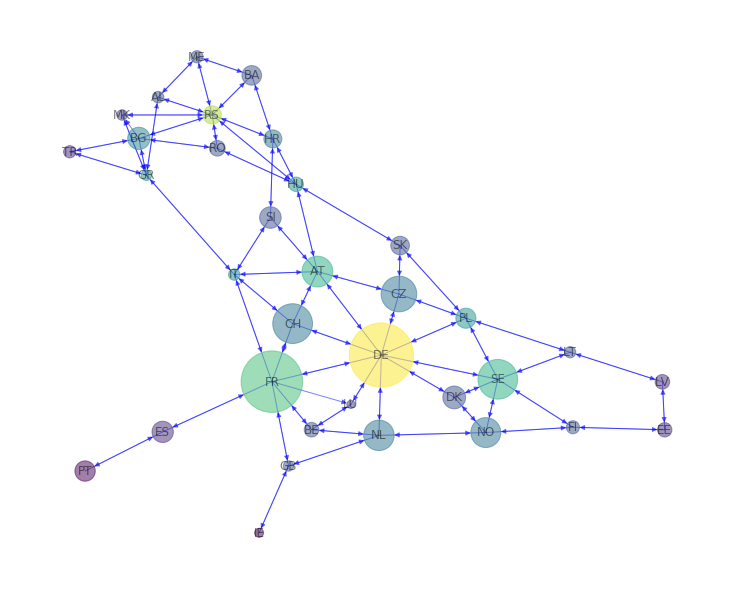

In [89]:
# plt.figure(figsize=(10,8))
# pos = nx.spring_layout(G, scale = 3)

# node_size = total_export/20
# node_color = [float(G.degree(v)) for v in G]

# nx.draw(G, pos, node_size=node_size, alpha=0.5, node_color=node_color,
#         edge_color='blue', style = "solid", width=1, with_labels=True)

# plt.axis('off')
# plt.show()

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: 
The set_clim function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use ScalarMappable.set_clim instead.


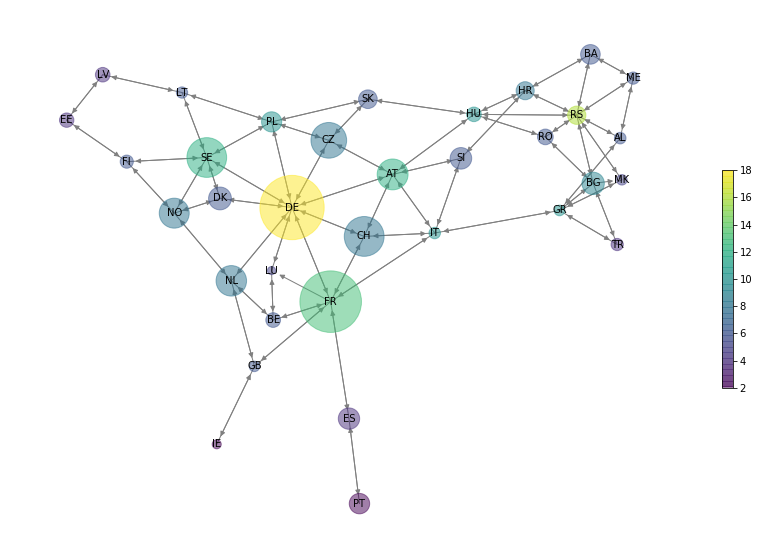

In [99]:
plt.figure(figsize=(13,10))
pos = nx.spring_layout(G, scale = 4)

node_size = total_export/20
node_color = [float(G.degree(v)) for v in G]

# Draw nodes
nodes = nx.draw_networkx_nodes(G,pos, node_size=node_size, node_color=node_color, alpha=0.5) 
# Draw edges
edges = nx.draw_networkx_edges(G, pos, edge_color='grey', width=1,)

# Add labels
nx.draw_networkx_labels(G,pos,font_size=10)
# nodes.set_edgecolor('gray')

# add a side bar with color scale for degree centrality
cbar = plt.colorbar(mappable=nodes, cax=None, ax=None, fraction=0.015, pad=0.04)
# cbar.set_clim(0,1)

plt.axis('off')
plt.show()

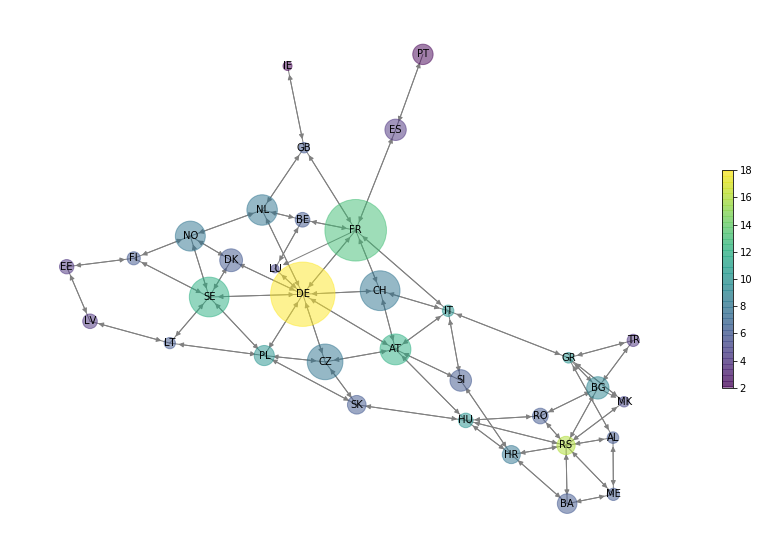

In [21]:
plt.figure(figsize=(13,10))
pos = nx.spring_layout(G, scale = 4)

node_size = total_export/20

# Draw nodes
nodes = nx.draw_networkx_nodes(G,pos, node_size=node_size, node_color=node_color, alpha=0.5) 
# Draw edges
edges = nx.draw_networkx_edges(G, pos, edge_size=edge_size, edge_color='grey', width=1,)

# Add labels
nx.draw_networkx_labels(G,pos,font_size=10)
# nodes.set_edgecolor('gray')

# add a side bar with color scale for degree centrality
cbar = plt.colorbar(mappable=nodes, cax=None, ax=None, fraction=0.015, pad=0.04)
#cbar.ScalarMappable.set_clim(0,1)

plt.axis('off')
plt.show()

DiDegreeView({'AL': 6, 'AT': 12, 'BA': 6, 'BE': 6, 'BG': 9, 'CH': 8, 'CZ': 8, 'DE': 18, 'DK': 6, 'EE': 4, 'ES': 4, 'FI': 6, 'FR': 13, 'GB': 6, 'GR': 10, 'HR': 8, 'HU': 10, 'IE': 2, 'IT': 10, 'LT': 6, 'LU': 5, 'LV': 4, 'ME': 6, 'MK': 5, 'NL': 8, 'NO': 8, 'PL': 10, 'PT': 2, 'RO': 6, 'RS': 16, 'SE': 12, 'SI': 6, 'SK': 6, 'TR': 4})

## Geo locations

In [33]:
geo = pd.read_excel('European_countries.xlsx')
geo.head()

,Origin_Country,Country_Code,AL,AT,BA,BE,BG,CH,CZ,DE,...,NO,PL,PT,RO,RS,SE,SI,SK,TR,Total
0,Albania,AL,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4
1,Austria,AT,0.0,NaN,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,7
2,Bosnia and Herzegovina,BA,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3
3,Belgium,BE,0.0,0.0,0.0,NaN,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
4,Bulgaria,BG,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,5


In [35]:
df_geo = geo.drop(['Origin_Country', 'Total'], axis=1)
df_geo.head()

,Country_Code,AL,AT,BA,BE,BG,CH,CZ,DE,DK,...,NL,NO,PL,PT,RO,RS,SE,SI,SK,TR
0,AL,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,AT,0.0,NaN,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,BA,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,BE,0.0,0.0,0.0,NaN,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,BG,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0


In [36]:
# Convert the wide table to long table
Country_list = list(df_geo.columns)
df_geo = df_geo.melt(id_vars=['Country_Code'], value_vars=(Country_list[1:]), var_name='Destination', value_name='Sharing_Border')
df_geo.rename(columns={'Country_Code':'Origin'}, inplace=True)
df_geo.dropna(axis=0, inplace=True)
df_geo = df_geo[df_geo.Sharing_Border != 0]
df_geo.head()

,Origin,Destination,Sharing_Border
14,GR,AL,1.0
22,ME,AL,1.0
23,MK,AL,1.0
29,RS,AL,1.0
39,CH,AT,1.0


In [55]:
graph_geo = np.asarray(df_geo[['Origin', 'Destination']])
nodes_geo = np.unique(graph_geo)
weights = list(map(float, df_geo['Sharing_Border']))
G_geo = nx.Graph()

for node in nodes_geo:
    G_geo.add_node(node)

graph_geo = []
for edge in graph_geo:
    G_geo.add_edge(edge[0], edge[1])
    graph_geo.append((edge[0], edge[1]))

labels = dict(list(zip(graph_geo, weights)))

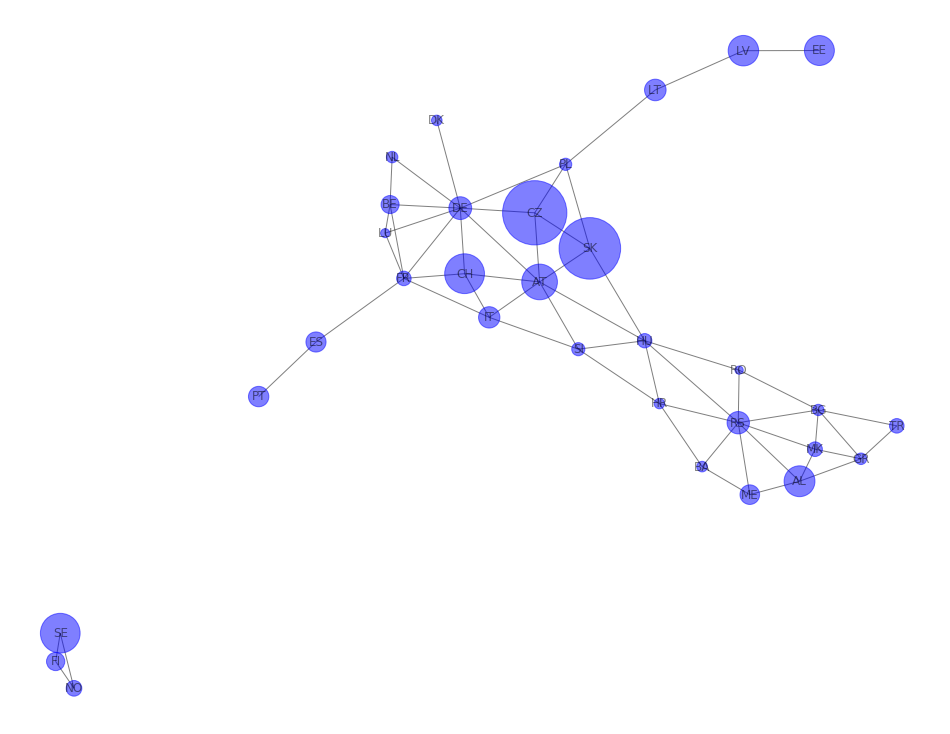

In [60]:
plt.figure(figsize=(13,10))
# pos = nx.spring_layout(G_geo, scale = 4)

node_size = total_export/20

G_geo = nx.from_pandas_edgelist(df_geo, 'Origin', 'Destination')
nx.draw(G_geo, node_color='blue', node_size = node_size, with_labels=True, alpha=0.5)

# # # Draw nodes
# nodes = nx.draw_networkx_nodes(G_geo, pos, node_size=node_size, with_lables=True, alpha=0.5) 
# # # Draw edges
# edges = nx.draw_networkx_edges(G_geo, pos, edge_color='grey', width=1,)

# Add labels
# nx.draw_networkx_labels(G_geo,pos,font_size=10)

plt.axis('off')
plt.show()

## Network analysis

- Betweenness centrality

Betweenness centrality quantifies the number of times a node acts as bridge along the shortest path between two other nodes. It is basically a measure of connectedness between components of the graph.

- Degree centrality

The centrality for a node measures its relative importance within the graph. The degree centrality for a node (n) is the number of nodes it is connected. The degree centrality values are normalized by the maximum degree in the graph. 

- Adjacency Matrix

The adjacency matrix is a N x N matrix where the cells constitute edges. In this example the fields are coloured according the degree centrality and as the graph is directed, the matrix is not symmetric.

In [ ]:
class graphStats:
    """
    calculte the degree centrality and betweenness centrality
    """
    
    def calculate_degree_centrality(self, graph):
        dgc_key = []
        dgc_value = []
        g = graph

        dc = nx.degree_centrality(g)
        nx.set_node_attributes(g, dc, 'degree_cent')

        from operator import itemgetter
        degcent_sorted = sorted(dc.items(), key=itemgetter(1), reverse=True)

        for key, value in degcent_sorted:
            dgc_key.append(str(key))
            dgc_value.append(value)

        return dgc_key, dgc_value
    

    def calculate_betweenness_centrality(self, graph):
        btc_key = []
        btc_value = []
        g = graph

        bc = nx.betweenness_centrality(g)

        betcent_sorted = sorted(bc.items(), key=itemgetter(1), reverse=True)

        for key, value in betcent_sorted:
            btc_key.append(str(key))
            btc_value.append(value)

        return btc_key, btc_value

In [ ]:
stats = graphStats()
betc_key, betc_value = stats.calculate_betweenness_centrality(G)
degc_key, degc_value = stats.calculate_degree_centrality(G)

In [ ]:
N = G.order()
K = G.size()
avg_d = float(N)/K
avg_degree = 'Average degree: %.4f' % (avg_d)

In [ ]:
avg_d

In [ ]:
avg_degree

In [ ]:
# plot Degree centrality
plt.figure()

ax1 = plt.subplots(figsize=(10,8))
plt.title('Degree centrality for nodes', fontsize=12)
a_lenght = np.arange(len(degc_value))
plt.bar(a_lenght, degc_key, color=cm.jet(degc_value), align='center')
plt.xticks(a_lenght, degc_key, size='small', rotation='vertical')
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=8)
plt.autoscale(enable=True, axis='both', tight=None)

In [ ]:
# Plot: Betweenness_centrality
plt.figure()

ax1 = plt.subplots(figsize=(10,6))

plt.title('Betweenness centrality for nodes', fontsize=12)
a_lenght = np.arange(len(betc_value))
plt.bar(a_lenght, betc_value, color=cm.jet(betc_value), align='center')
plt.xticks(a_lenght, betc_key, size='small', rotation='vertical')
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=8)
plt.autoscale(enable=True, axis='both', tight=None)
plt.ylim(0, max(betc_value) * 1.1)
plt.plot(betc_value, '--b')